# PyGMT の基本

ここでは，基本的な地図作成を通じてPyGMTの使い方の基本を学びます．

## 準備

### Jupyter Notebookの立ち上げ

本節以降では，Jupyter NotebookでインタラクティブにPyGMTを実行していくことにします．そこで，（minicondaによるインストールの場合は仮想環境を`activate`したのちに）端末から
```bash
jupyter notebook
```
によりJupyter Notebookを起動します．すると自動的に既定のブラウザが立ち上がります．別のブラウザウィンドウからも，http://localhost:8888 にアクセスするとJupyterにアクセスができるはずです．
この記事もそうしてJupyter Notebook上で作成しています．

```{caution}
もしJupyter Notebookを複数立ち上げていると，接続のためのポート番号が 8888 から変わることがあります．詳しくはJupyter Notebookの起動時メッセージに記載されているはずです．
```

```{tip}
別の方法として，VSCodeで `.ipynb` 拡張子のファイルを作成する方法もあります．[VSCode](https://code.visualstudio.com)はMicrosoftにより開発されているテキストエディタですが，Pythonプログラミングのための公式拡張機能を導入すれば，Jupyter Notebook形式を直接編集でき，かつminicondaで作成した仮想環境をカーネルとして選択してノートブック内のPythonスクリプトを実行することができます．
```

### モジュールのimport

PyGMTを使うためには，まず `import` します．

In [1]:
import pygmt

これで，`pygmt.XXX` という形でPyGMT内のオブジェクトを呼び出せるようになりました．

また，画像の保存場所として `fig` ディレクトリを作成しておきましょう．Jupyter Notebookでは行の先頭に `!` をつけるか，あるいはセルの1行目に `%%bash` と書くことでシェルコマンドを実行できます．

In [2]:
%%bash
# fig ディレクトリが存在しなければ作成する
if [ ! -d fig ]; then
  mkdir fig
fi

PyGMTは活発な更新がなされているため，このページに含まれているサンプルコードも，バージョンによっては修正が必要であったり，警告がでたりします．自分の使っているPyGMTのバージョンを確認するには，以下のように `show_versions()`関数が便利です．

In [8]:
pygmt.show_versions()

PyGMT information:
  version: v0.9.0
System information:
  python: 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:58:31) [Clang 14.0.6 ]
  executable: /opt/homebrew/Caskroom/miniconda/base/envs/pygmt-howto-v0.9/bin/python
  machine: macOS-13.0-arm64-arm-64bit
Dependency information:
  numpy: 1.24.3
  pandas: 2.0.2
  xarray: 2023.5.0
  netCDF4: 1.6.3
  packaging: 23.1
  contextily: None
  geopandas: None
  ghostscript: 9.54.0
GMT library information:
  binary version: 6.4.0
  cores: 8
  grid layout: rows
  image layout: 
  library path: /opt/homebrew/Caskroom/miniconda/base/envs/pygmt-howto-v0.9/lib/libgmt.dylib
  padding: 2
  plugin dir: /opt/homebrew/Caskroom/miniconda/base/envs/pygmt-howto-v0.9/lib/gmt/plugins
  share dir: /opt/homebrew/Caskroom/miniconda/base/envs/pygmt-howto-v0.9/share/gmt
  version: 6.4.0


`show_versions()`関数では，上の例のように利用している関連ライブラリのバージョンやその格納状況まで詳しい情報が得られます．単にPyGMT単独のバージョンが知りたかったら，

In [9]:
print(pygmt.__version__)

v0.9.0


という方法もあります．これはほとんどのPythonライブラリに対して共通に使える方法です．．

## PyGMTによる作図の基本

`pygmt`では，まず

```
fig = pygmt.Figure()
```
で図のオブジェクトを作成し，GMTのコマンドに相当する
```
fig.XXXXX()
```
を重ねていくことで作図していきます．最後に
```
fig.show()
```
とすればJupyter Notebook上に表示されますし，
```
fig.savefig(filename)
```
とすると`filename`の拡張子に応じて画像ファイルとして保存できます．もうすこし融通の効く（その代わりにやや複雑な）画像保存の方法は [こちら](./savefig.ipynb) で説明します．

## 基本の地図

まずは単純な，従来のGMTでの `gmt pscoast` コマンドに相当する地図を作図してみましょう．各オプションの意味はコード内コメントを参照してください．

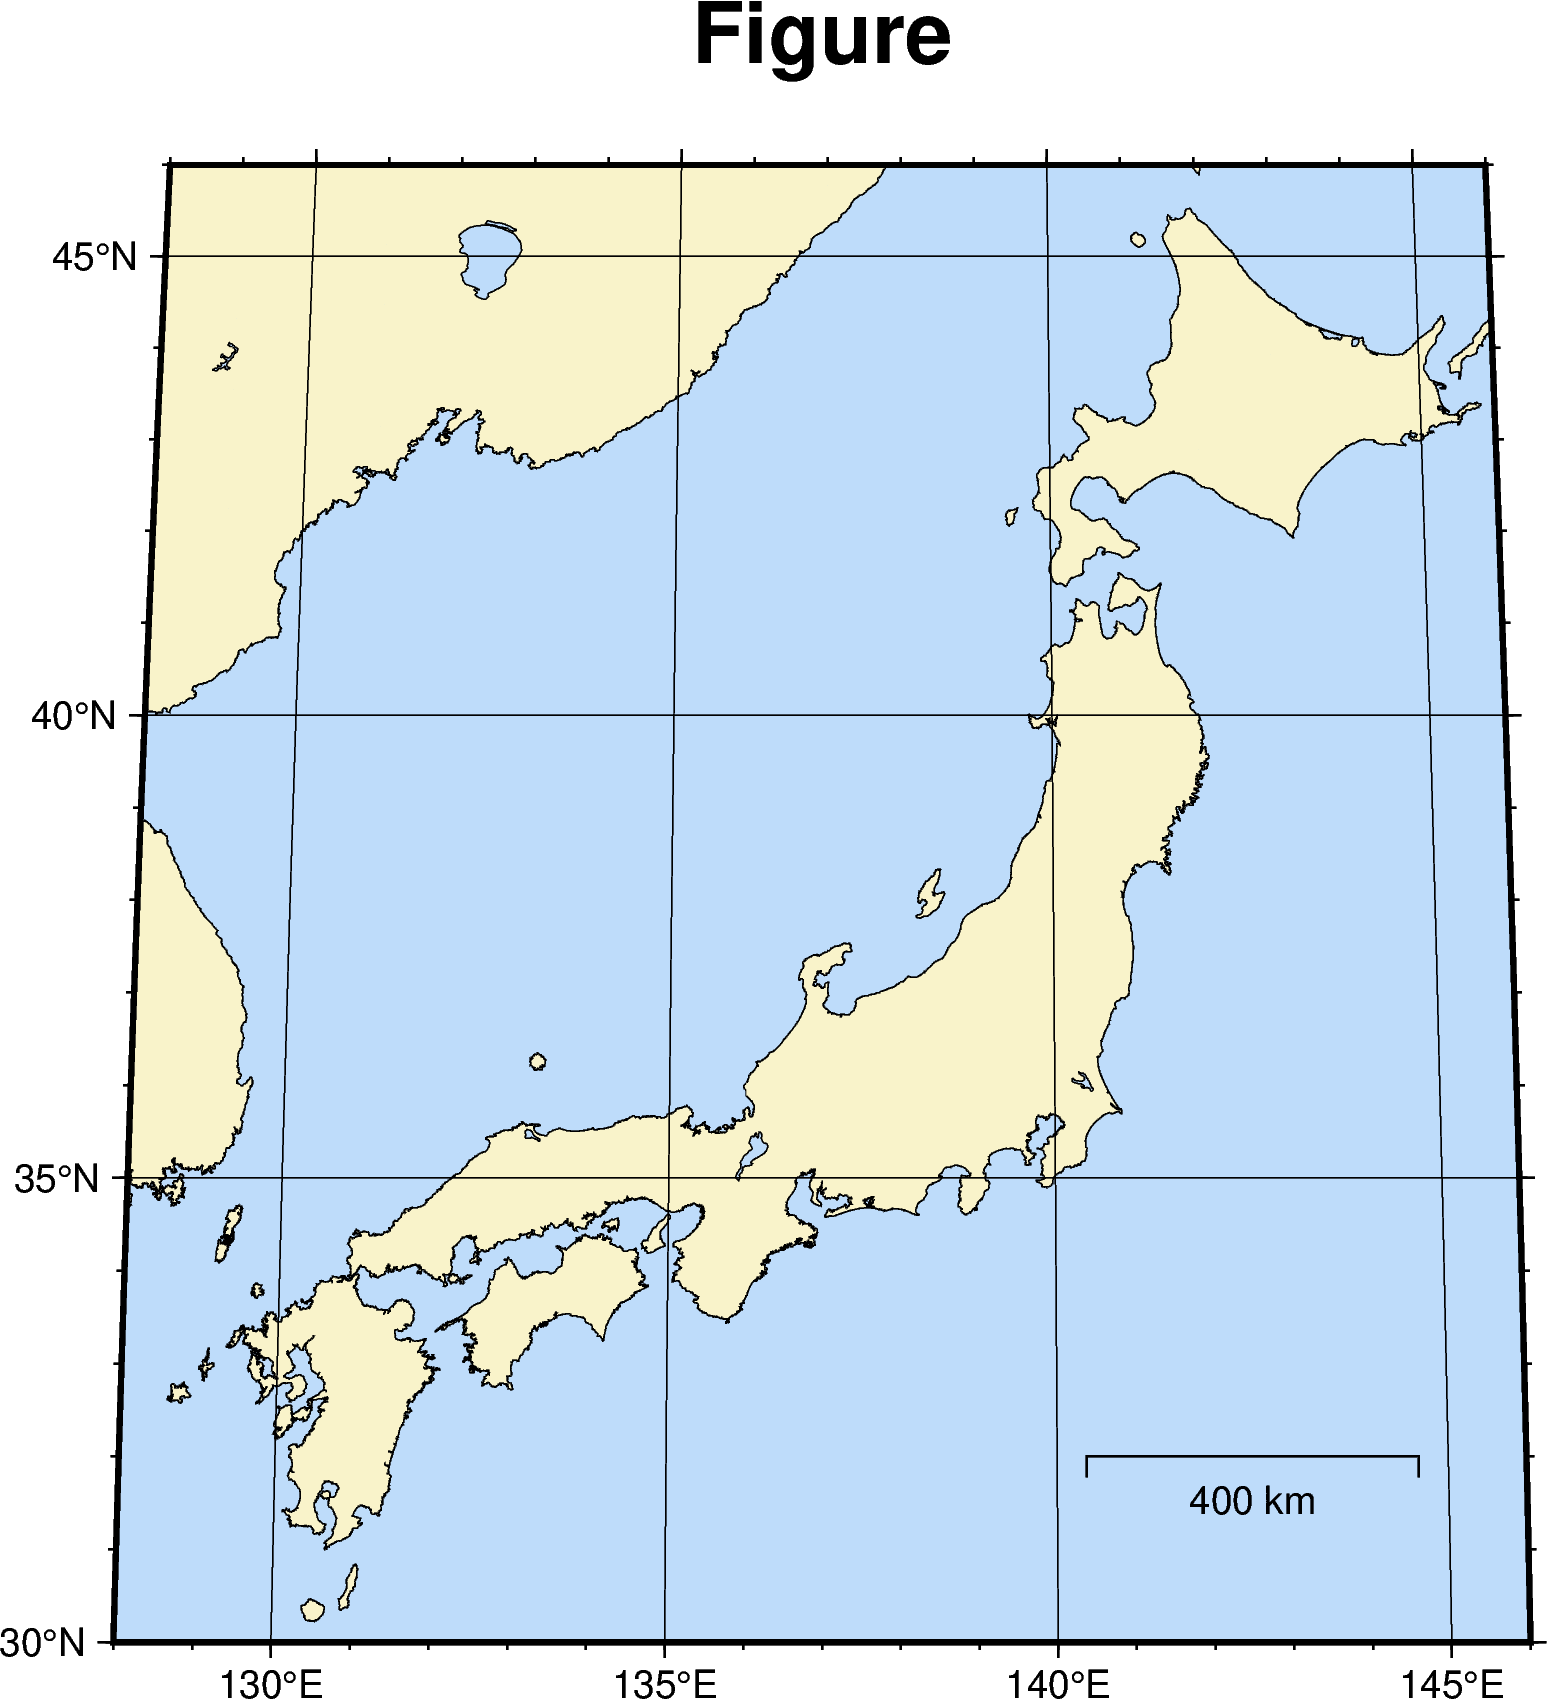

In [3]:
fig = pygmt.Figure()

fig.coast(
    projection  = 'N138/12c',                         # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域は西端・東端・南端・北端の順にリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定（後述）
    area_thresh = 100,                                # 細かい領域の描画下限 (km^2) 値を大きくすると小さな島が消える
    resolution  = 'f',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg']  # 南西に軸名・タイトル指定（+t) およびXY方向それぞれの軸情報
)

fig.show()
fig.savefig('fig/pygmt-coastline.png')

### Jupyter Notebookにおける画像の表示

結果をJupyter Notebook内で見るだけならば `fig.show()`を指定します．画像として保存するなら `fig.savefig` ですが，`png`のほか `pdf`なども指定可能です．また，`show=True`オプションをつけると，その環境で標準のビューワ（たとえばmacOSならPreview.app）が起動します．

また，`fig.show()` に `width=`オプションで数字を指定すると，表示される図の大きさを指定できます．

### 投影法
`fig.coast`の`projection`オプションで地図投影法を指定しています．ここではロビソン図法（`-JN`）を用いています．この図法では，中心線の経度（`138`）と図の横幅の大きさ（`12c`）を指定する必要があります．投影法の特徴により，図の縦の大きさは描画範囲と横幅から自動的に決まります．

よく使われるメルカトル図法の場合は中心の経度は必要なく，たとえば `-JM12c` のように指定します．この場合も縦方向の大きさは指定できません．

GMTには多種多様な投影法が用意されていますが，ここではその網羅的な説明はしません．必要に応じて他解説や公式マニュアルを参照してください．

### ペンと色

GMTにおける線の描画は 

- 太さ (太さの名前あるいは数値）
- 色 （色名 あるいは RGB）
- パターン（パターン名あるいは数値）

の3つの情報を `,` で組み合わせます．上記のスクリプトの場合は太さが `default`，色が `black` を組み合わせています．パターンは実線・破線・点線などですが，省略したことでデフォルトの実線が選ばれています．

太さの選択肢には `faint`, `default`, `thinnest`, `thinner`, `thin`, `thick`, `thicker`, `thickest`, `fat`, `fatter`, `fattest` があります．左ほど細いです．色名は主な名前は使えるようです．パターンは`dotted, dashed, solid`のほか，たとえば`..`だと点線，`--`だと破線，`-.-`だと一点鎖線のような指定もできます．

色は名前のほか，光の三原色 Red(R), Green(G), Blue(B)の大きさを0-255までの数値で表して，`R/G/B` で表現することもできます．

### 地図描画 Tips: `resolution` と `area_thresh`

海岸線の解像度は5種類ありますが，粗すぎても細かすぎても綺麗な図になりません．大は小を兼ねると思うかもしれませんが，細かすぎると微細な地形の特徴まで描画されるため，細かな島やリアス式海岸などでごちゃごちゃした印象になりがちです．解像度だけを変えた図を以下に示します．

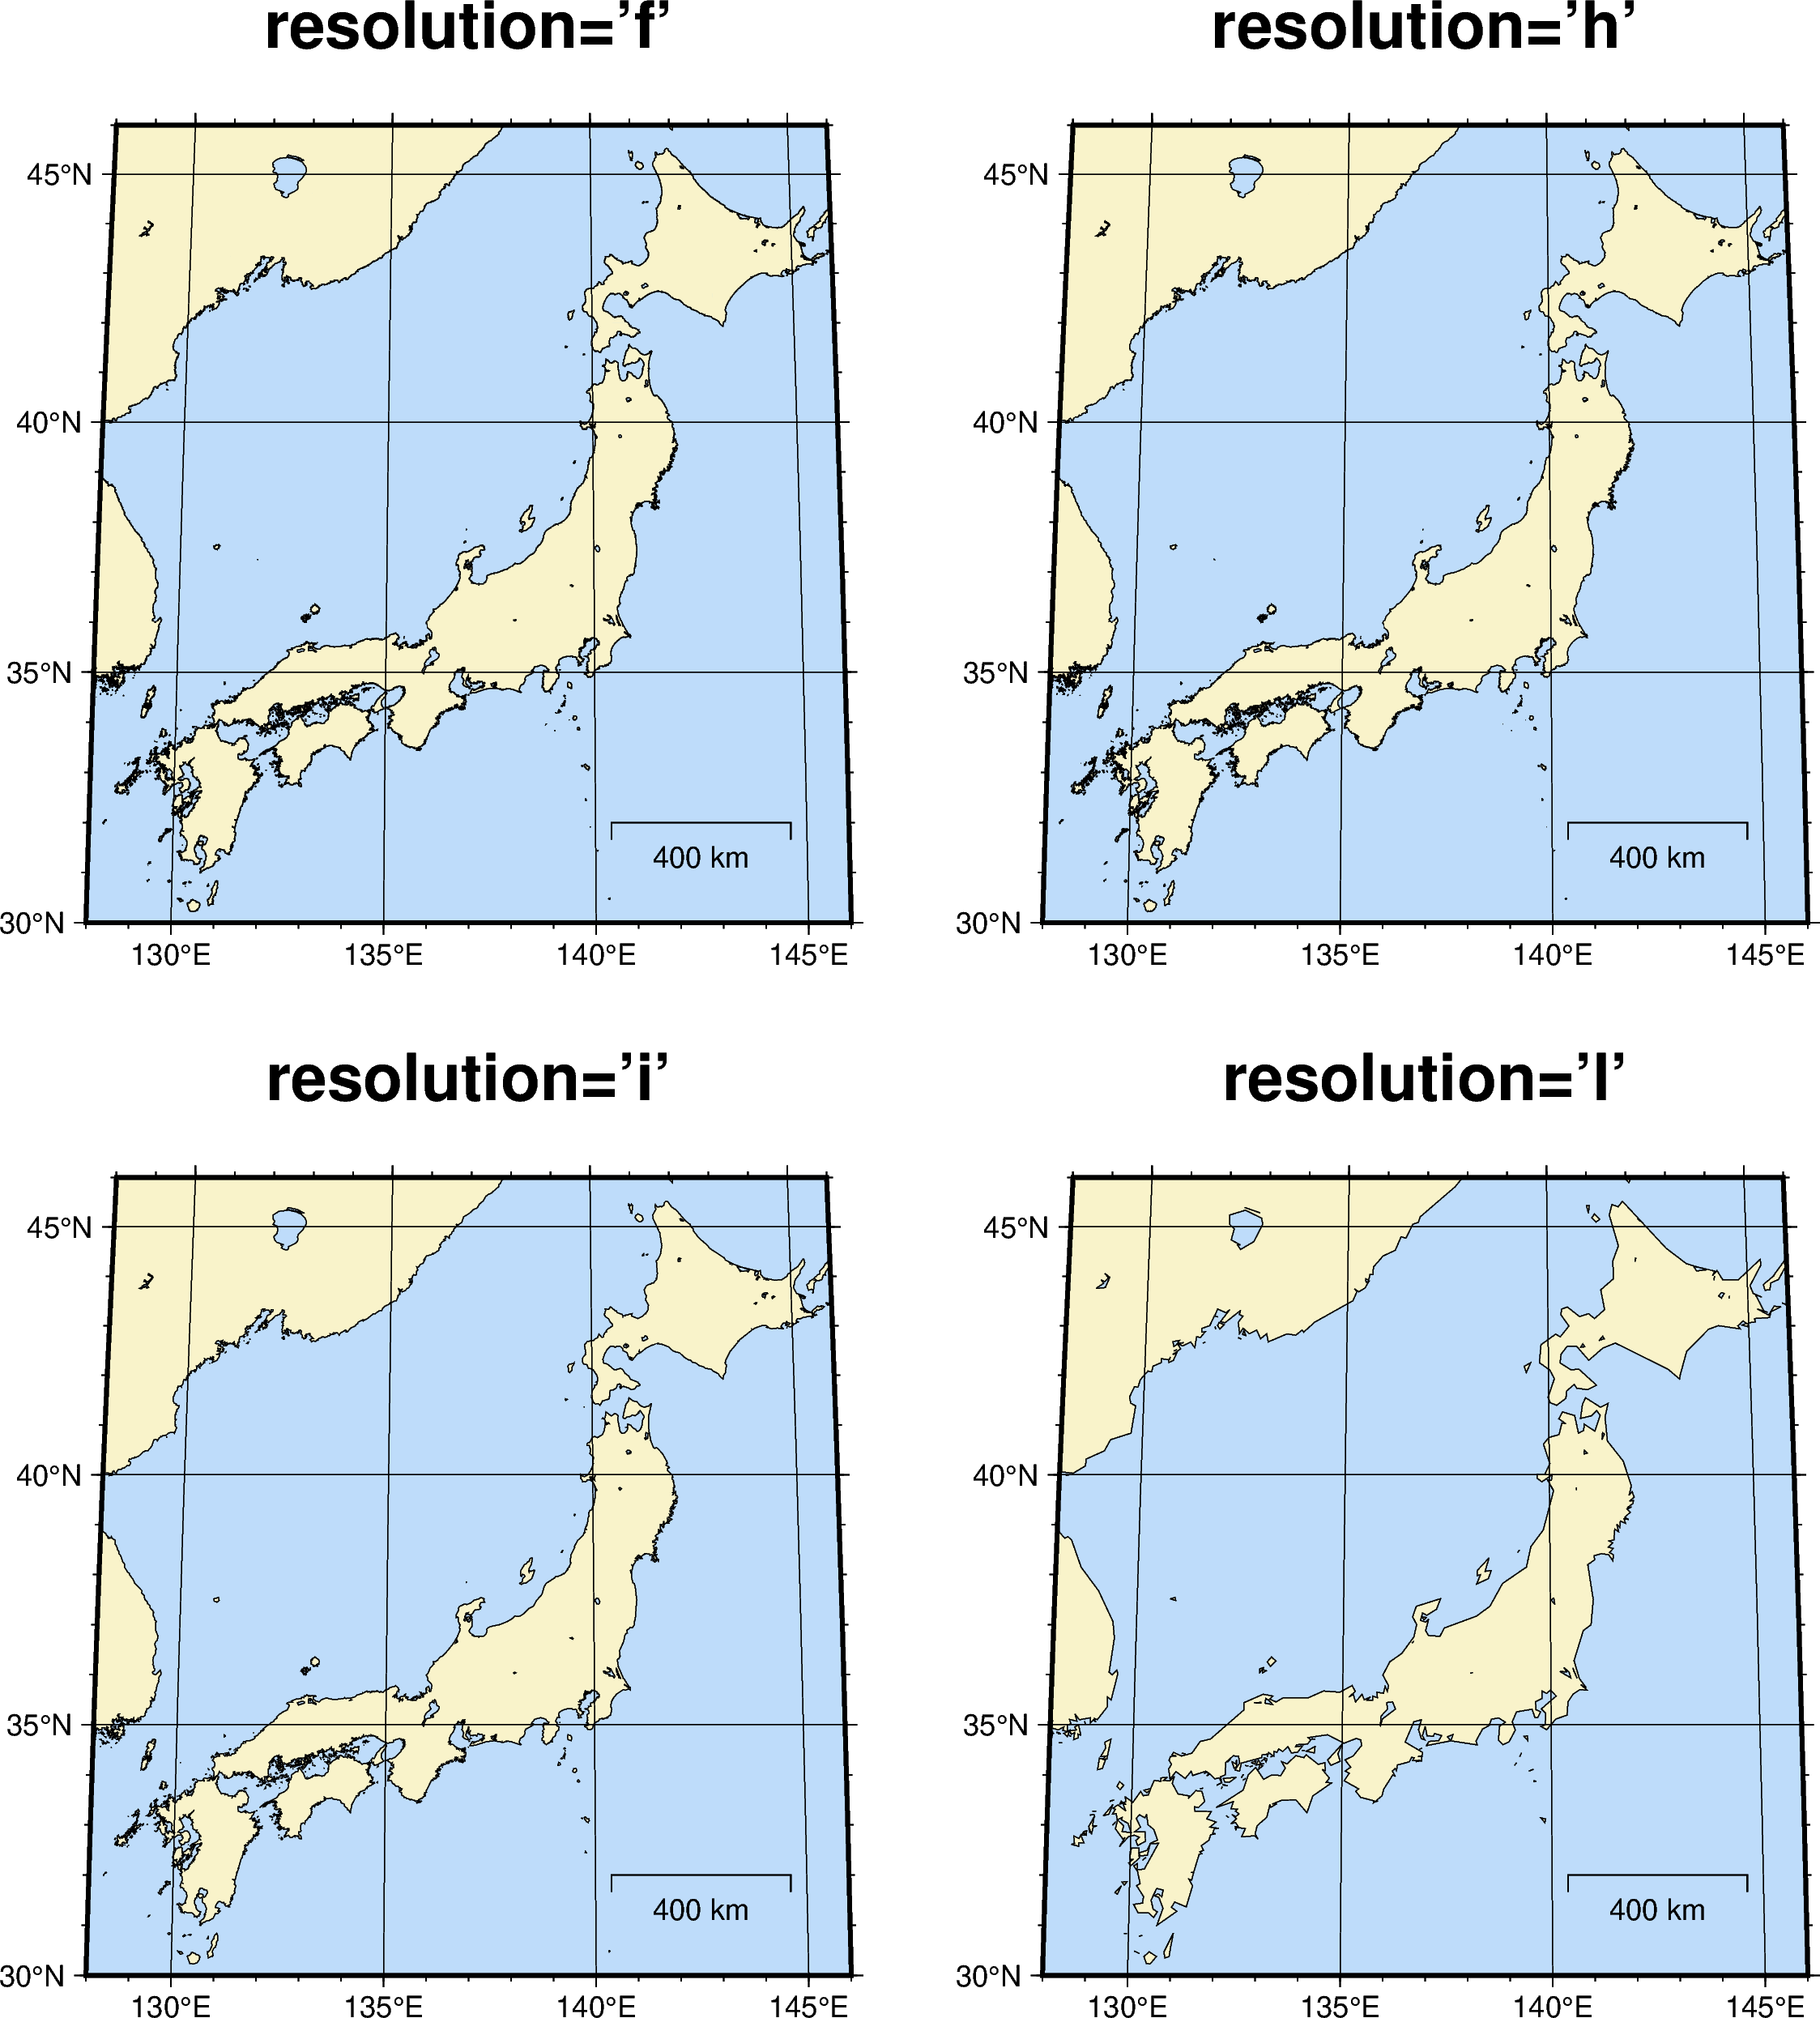

In [4]:
fig = pygmt.Figure()

fig.shift_origin(3, 25)

fig.coast(
    projection  = 'N138/8c',                          # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    resolution  = 'f',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    frame       = ['WSen+t"resolution='"'f'"'"', 'xafg', 'yafg']  # 南西に軸名・タイトル指定（+t) およびXY方向それぞれの軸情報
)

fig.shift_origin(10, 0)
fig.coast(
    projection  = 'N138/8c',                          # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    resolution  = 'h',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    frame       = ['WSen+t"resolution='"'h'"'"', 'xafg', 'yafg']  # 南西に軸名・タイトル指定（+t) およびXY方向それぞれの軸情報
)

fig.shift_origin(-10, -11)
fig.coast(
    projection  = 'N138/8c',                          # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    resolution  = 'i',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    frame       = ['WSen+t"resolution='"'i'"'"', 'xafg', 'yafg']  # 南西に軸名・タイトル指定（+t) およびXY方向それぞれの軸情報
)

fig.shift_origin(10, 0)
fig.coast(
    projection  = 'N138/8c',                          # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    resolution  = 'l',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    frame       = ['WSen+t"resolution='"'l'"'"', 'xafg', 'yafg']  # 南西に軸名・タイトル指定（+t) およびXY方向それぞれの軸情報
)

fig.show()

高解像度ほどよいかというと，特に瀬戸内海などは小さな島がたくさん描画されて，真っ黒になってしまっています．そこで活躍するのが `area_thresh` オプションです．このオプションを指定すると，数値で与えられた面積（km$^2$）以下のサイズのものが描画されなくなります．そこで，海岸線の解像度は高めにしつつ，`area_thresh`を適宜設定すると綺麗な海岸線が描画できます．いくつか`area_thresh`の数値を変えた例を示しましょう．

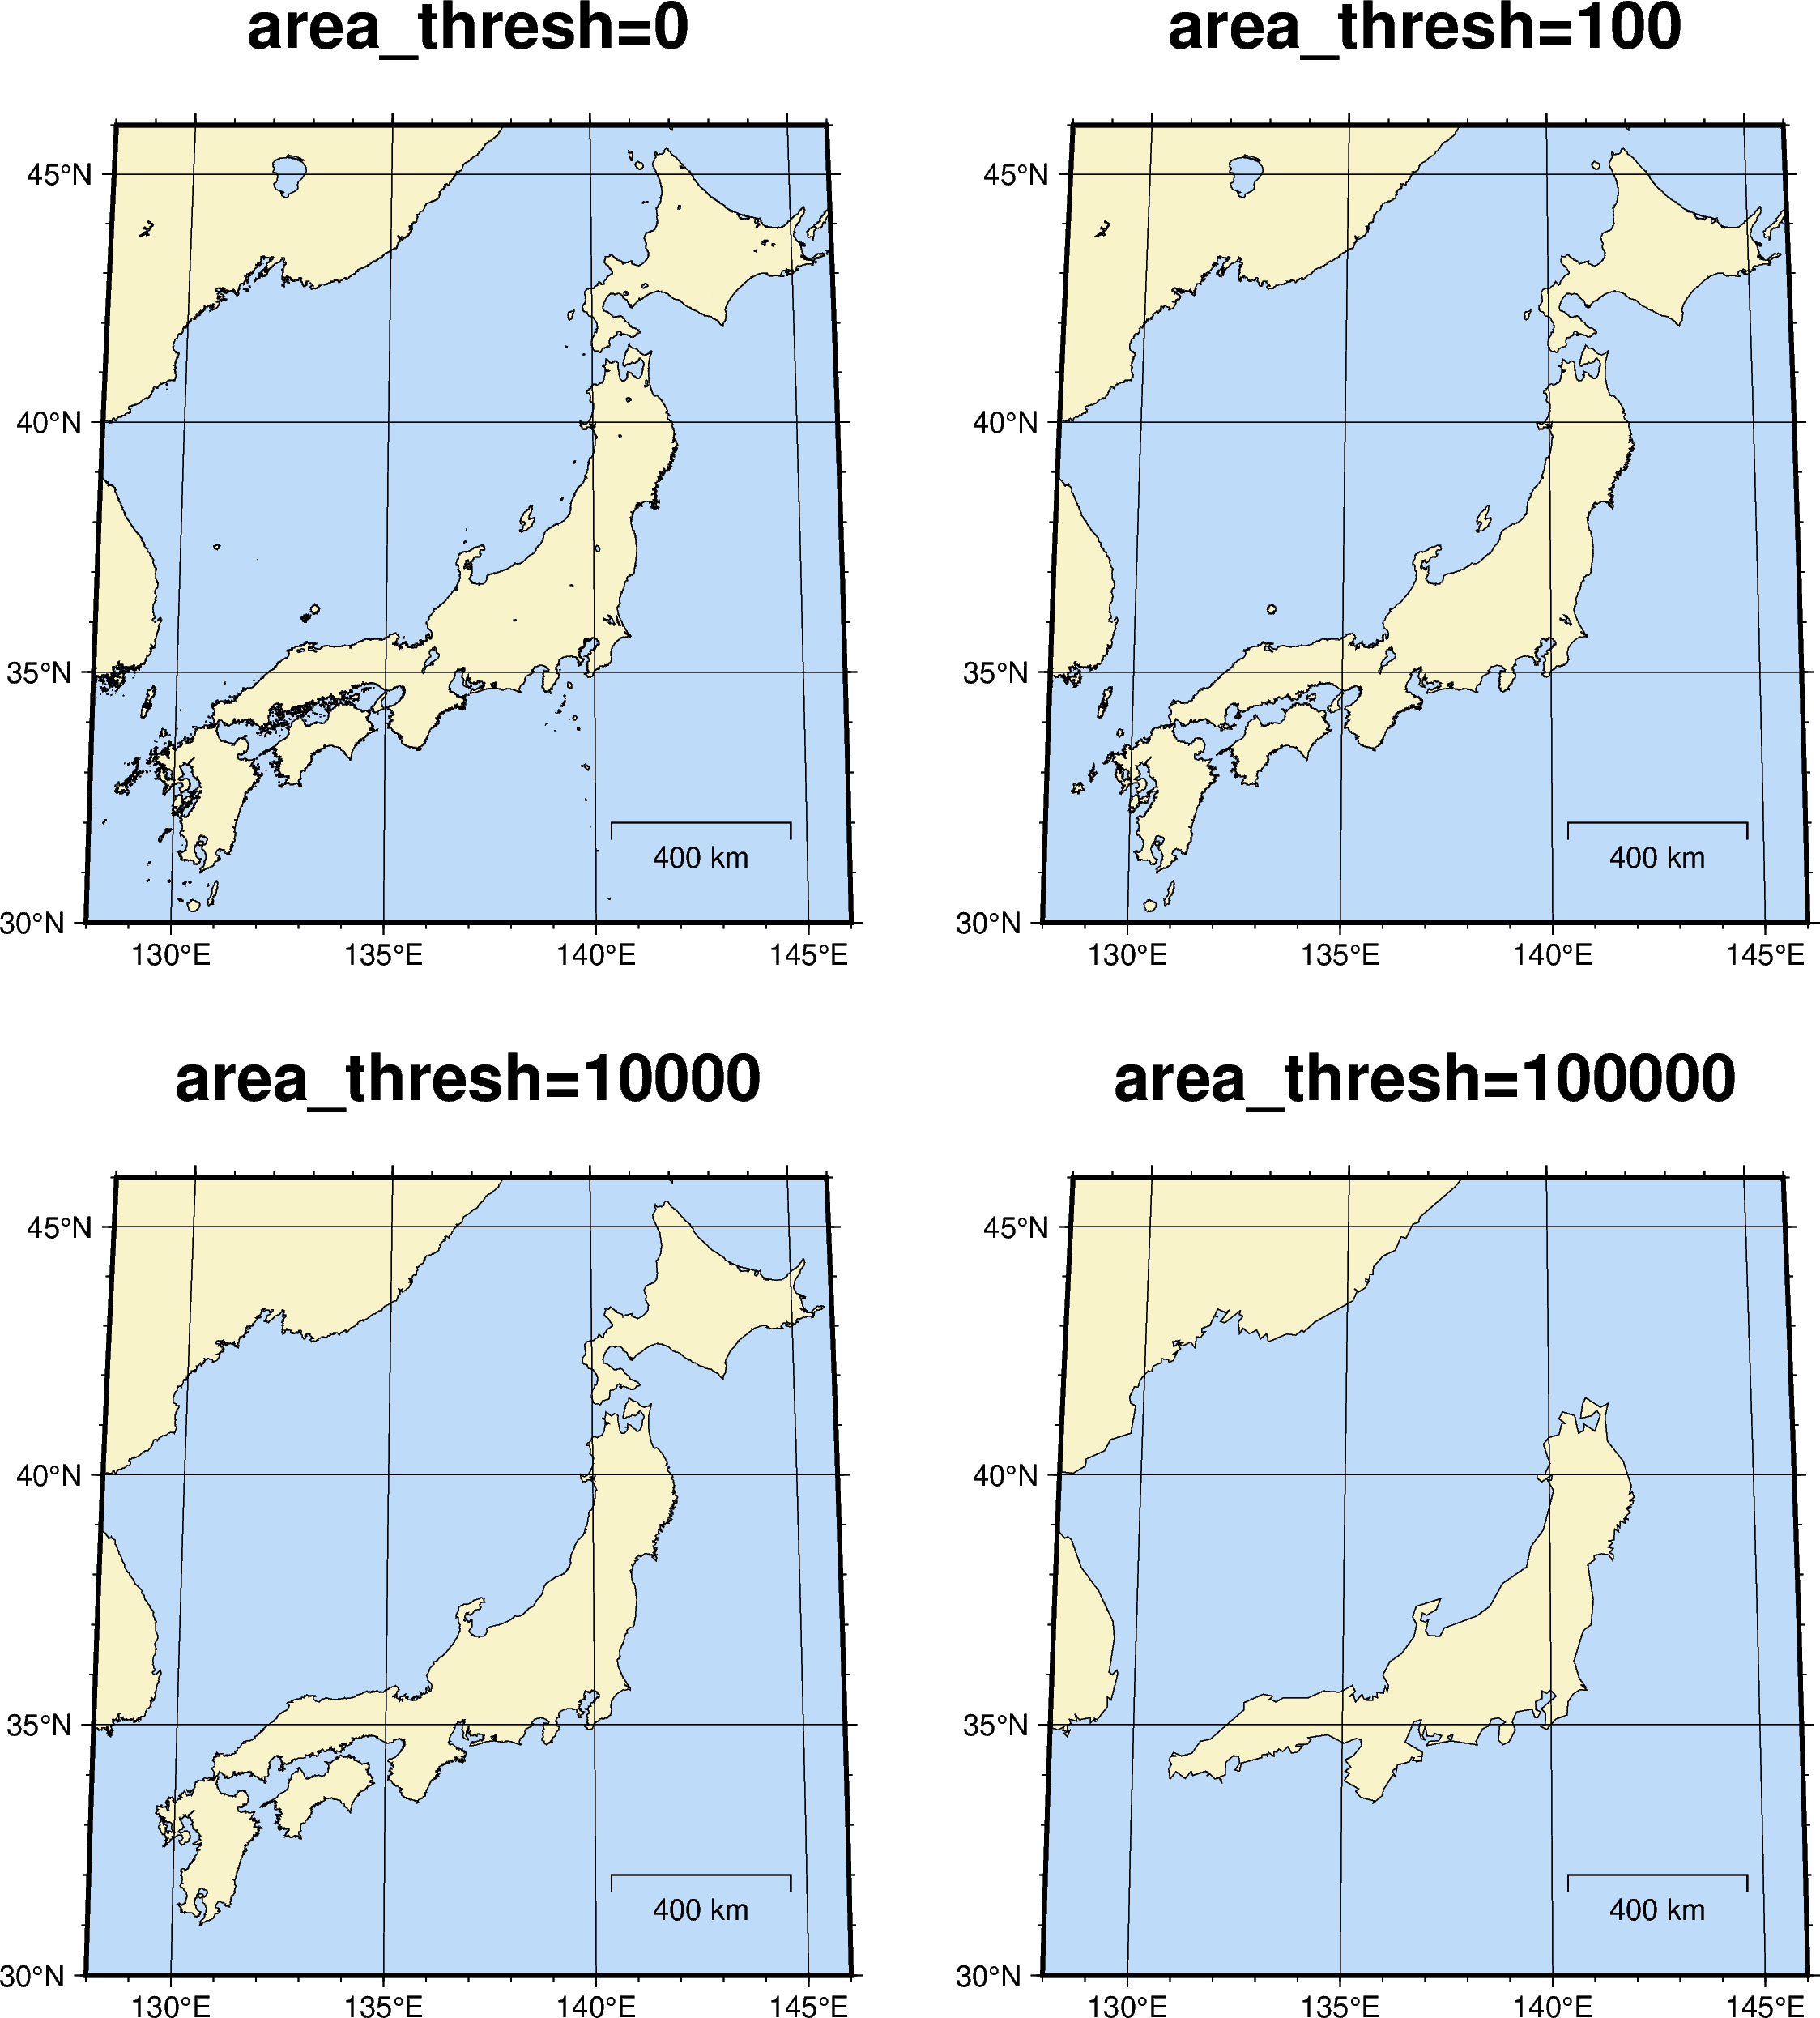

In [5]:
fig = pygmt.Figure()

fig.shift_origin(3, 25)

fig.coast(
    projection  = 'N138/8c',                         
    region      = (128, 146, 30, 46),                 
    shorelines  = 'default,black',                    
    resolution  = 'f',  
    land        = '249/243/202',                      
    water       = '190/220/250',                      
    map_scale   = '142.5/32/32/400',                  
    area_thresh = 0, 
    frame       = ['WSen+t"area_thresh=0"', 'xafg', 'yafg']
)

fig.shift_origin(10, 0)
fig.coast(
    projection  = 'N138/8c',                          # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    resolution  = 'h',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    area_thresh = 100, 
    frame       = ['WSen+t"area_thresh=100"', 'xafg', 'yafg']
)

fig.shift_origin(-10, -11)
fig.coast(
    projection  = 'N138/8c',                          # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    resolution  = 'i',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    area_thresh = 10000, 
    frame       = ['WSen+t"area_thresh=10000"', 'xafg', 'yafg']

)

fig.shift_origin(10, 0)
fig.coast(
    projection  = 'N138/8c',                          # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    resolution  = 'l',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '249/243/202',                      # 陸地の色を 0-255の値の R/G/B で指定
    water       = '190/220/250',                      # 水の色を 0-255の値の R/G/B で指定
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    area_thresh = 100000, 
    frame       = ['WSen+t"area_thresh=100000"', 'xafg', 'yafg']

)

fig.show()

後半は明らかにやりすぎですね．
日本列島全体を表示するなら，`area_thresh=100`程度がほどよいように思います．もっと細かな地域を表示する場合は，適宜`area_thresh`の値を小さくするとよいでしょう．

### `basemap` とパラメタの省略

上記の例では `fig.coast` ひとつですべてを描画しましたが，軸の描画を `fig.basemap` に任せることもできます：

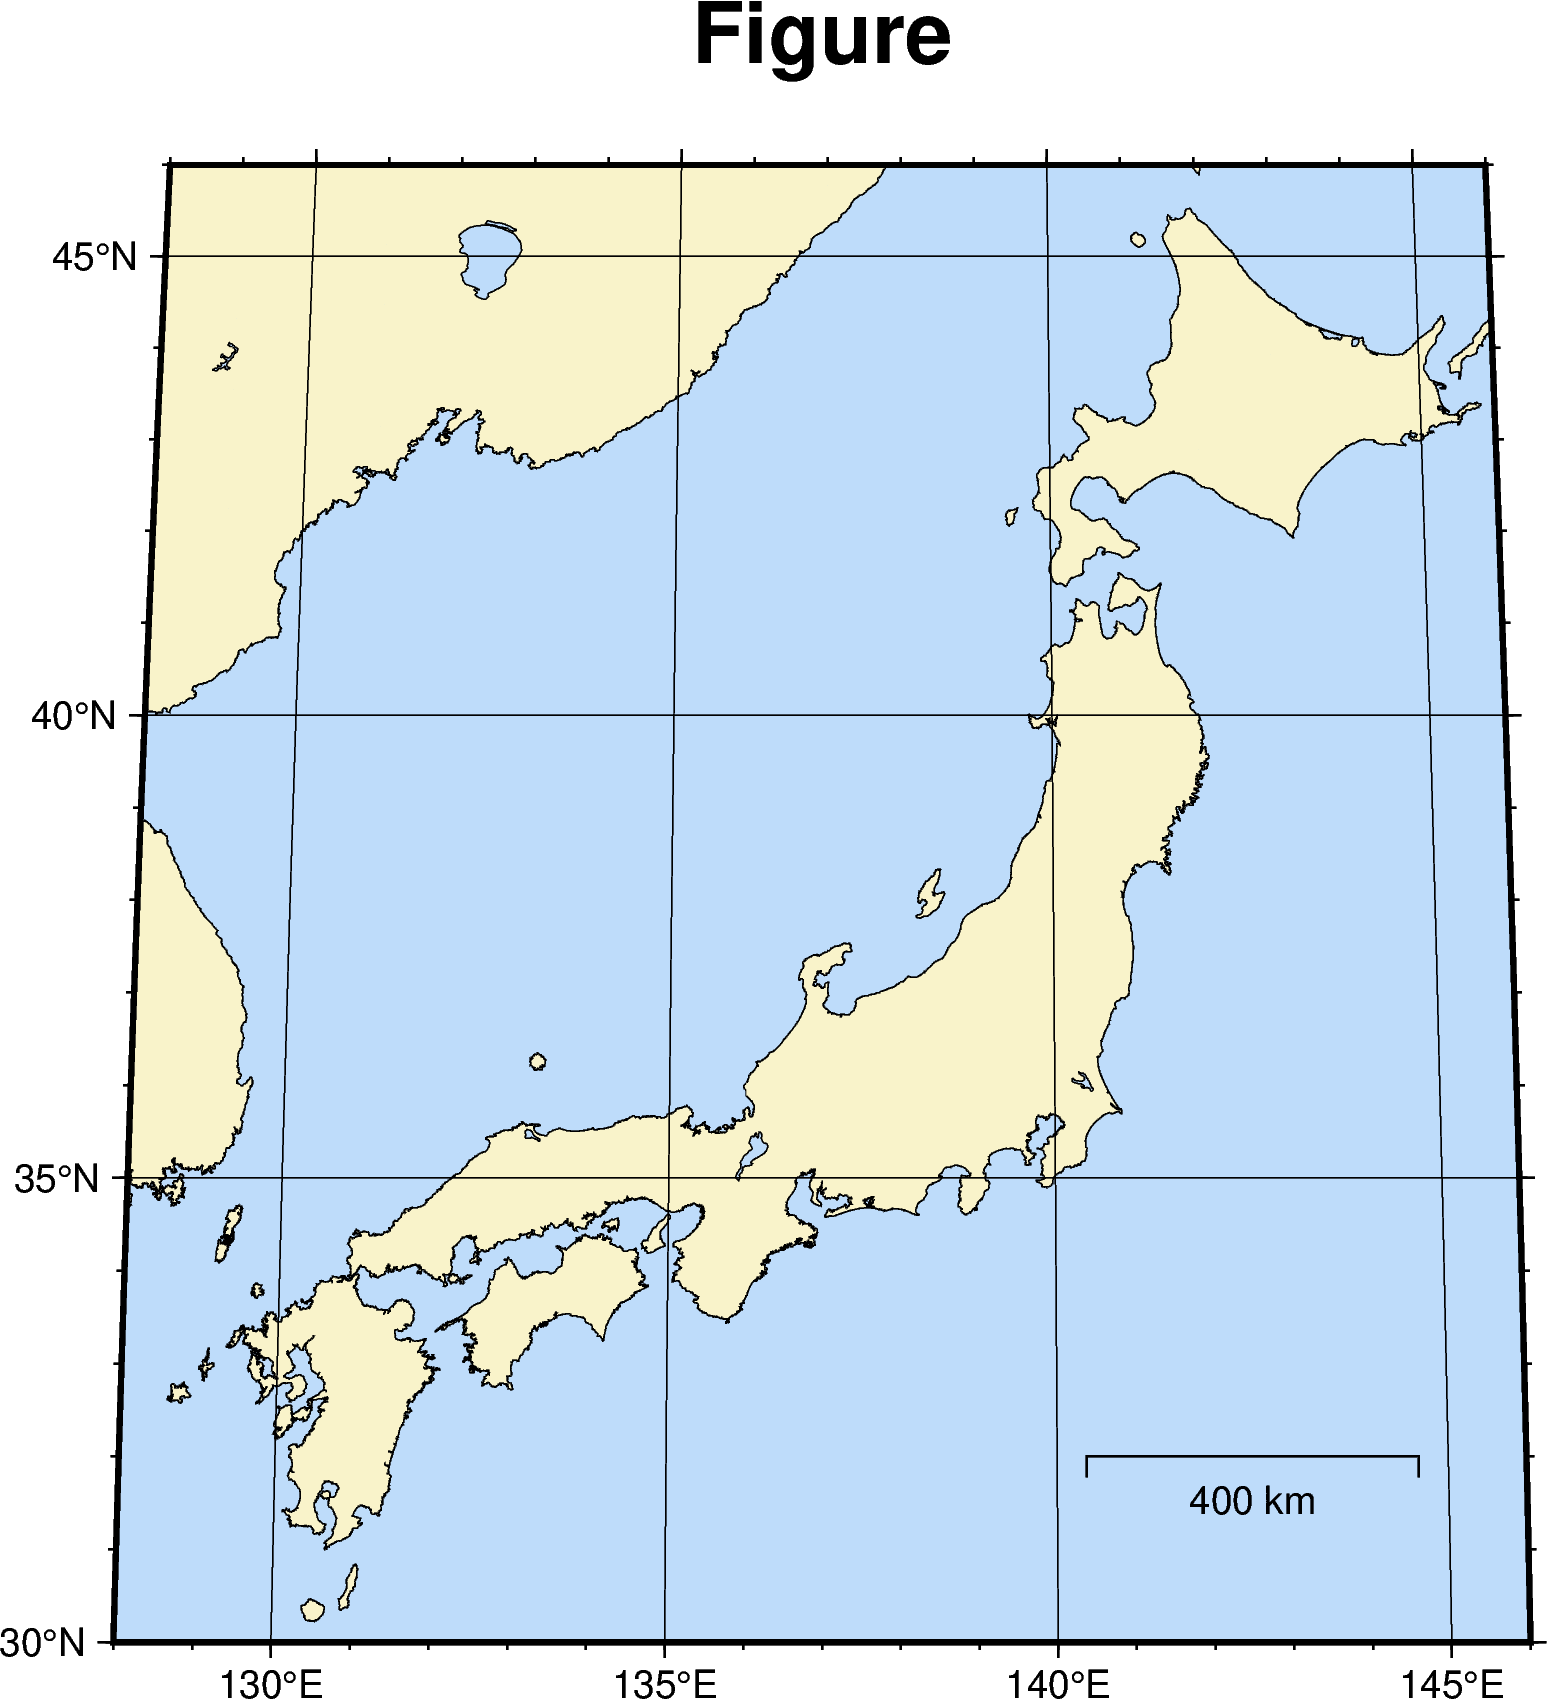

In [6]:
fig = pygmt.Figure()


fig.coast(
    projection  = 'N138/12c',          
    region      = (128, 146, 30, 46),  
    shorelines  = 'default,black',     
    area_thresh = 100,                 
    resolution  = 'f',                 
    land        = '249/243/202', 
    water       = '190/220/250', 
    map_scale   = '142.5/32/32/400',   
)

fig.basemap(
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)

fig.show()

上記の例では，`fig.basemap` のオプションは `frame` しかないことに注目してください．

必須と思える `projection` や `region` といったオプションは，その前の `fig.coast` で用いられた値が自動的に引き継がれています．

## GMTから移行するユーザー向けの話題

### エイリアス

PyGMTでは，従来のGMTと比べてオプションの意味が多くの人にとってわかりやすい名前がつけられています．一方，昔からのGMTのオプション名を把握している筆者のような古代人向け（？）に，従来オプション名のエイリアスも設定されています．たとえば先程の地図は，以下のようなエイリアスオプション名を用いて作成することもできます．初めて見る人には全く意味不明のオプションでしょうが，GMTに馴染みのある人にはむしろ使いやすいかもしれません．

/var/folders/x3/nldc_t6578d7dv9ncgwfk94r0000gn/T/ipykernel_22450/1816858382.py:3: SyntaxWarning: Short-form parameter (R) is not recommended. Use long-form parameter 'region' instead.
  fig.coast(
/var/folders/x3/nldc_t6578d7dv9ncgwfk94r0000gn/T/ipykernel_22450/1816858382.py:3: SyntaxWarning: Short-form parameter (J) is not recommended. Use long-form parameter 'projection' instead.
  fig.coast(
/var/folders/x3/nldc_t6578d7dv9ncgwfk94r0000gn/T/ipykernel_22450/1816858382.py:3: SyntaxWarning: Short-form parameter (A) is not recommended. Use long-form parameter 'area_thresh' instead.
  fig.coast(
/var/folders/x3/nldc_t6578d7dv9ncgwfk94r0000gn/T/ipykernel_22450/1816858382.py:3: SyntaxWarning: Short-form parameter (B) is not recommended. Use long-form parameter 'frame' instead.
  fig.coast(
/var/folders/x3/nldc_t6578d7dv9ncgwfk94r0000gn/T/ipykernel_22450/1816858382.py:3: SyntaxWarning: Short-form parameter (D) is not recommended. Use long-form parameter 'resolution' instead.
  fig.coast(
/va

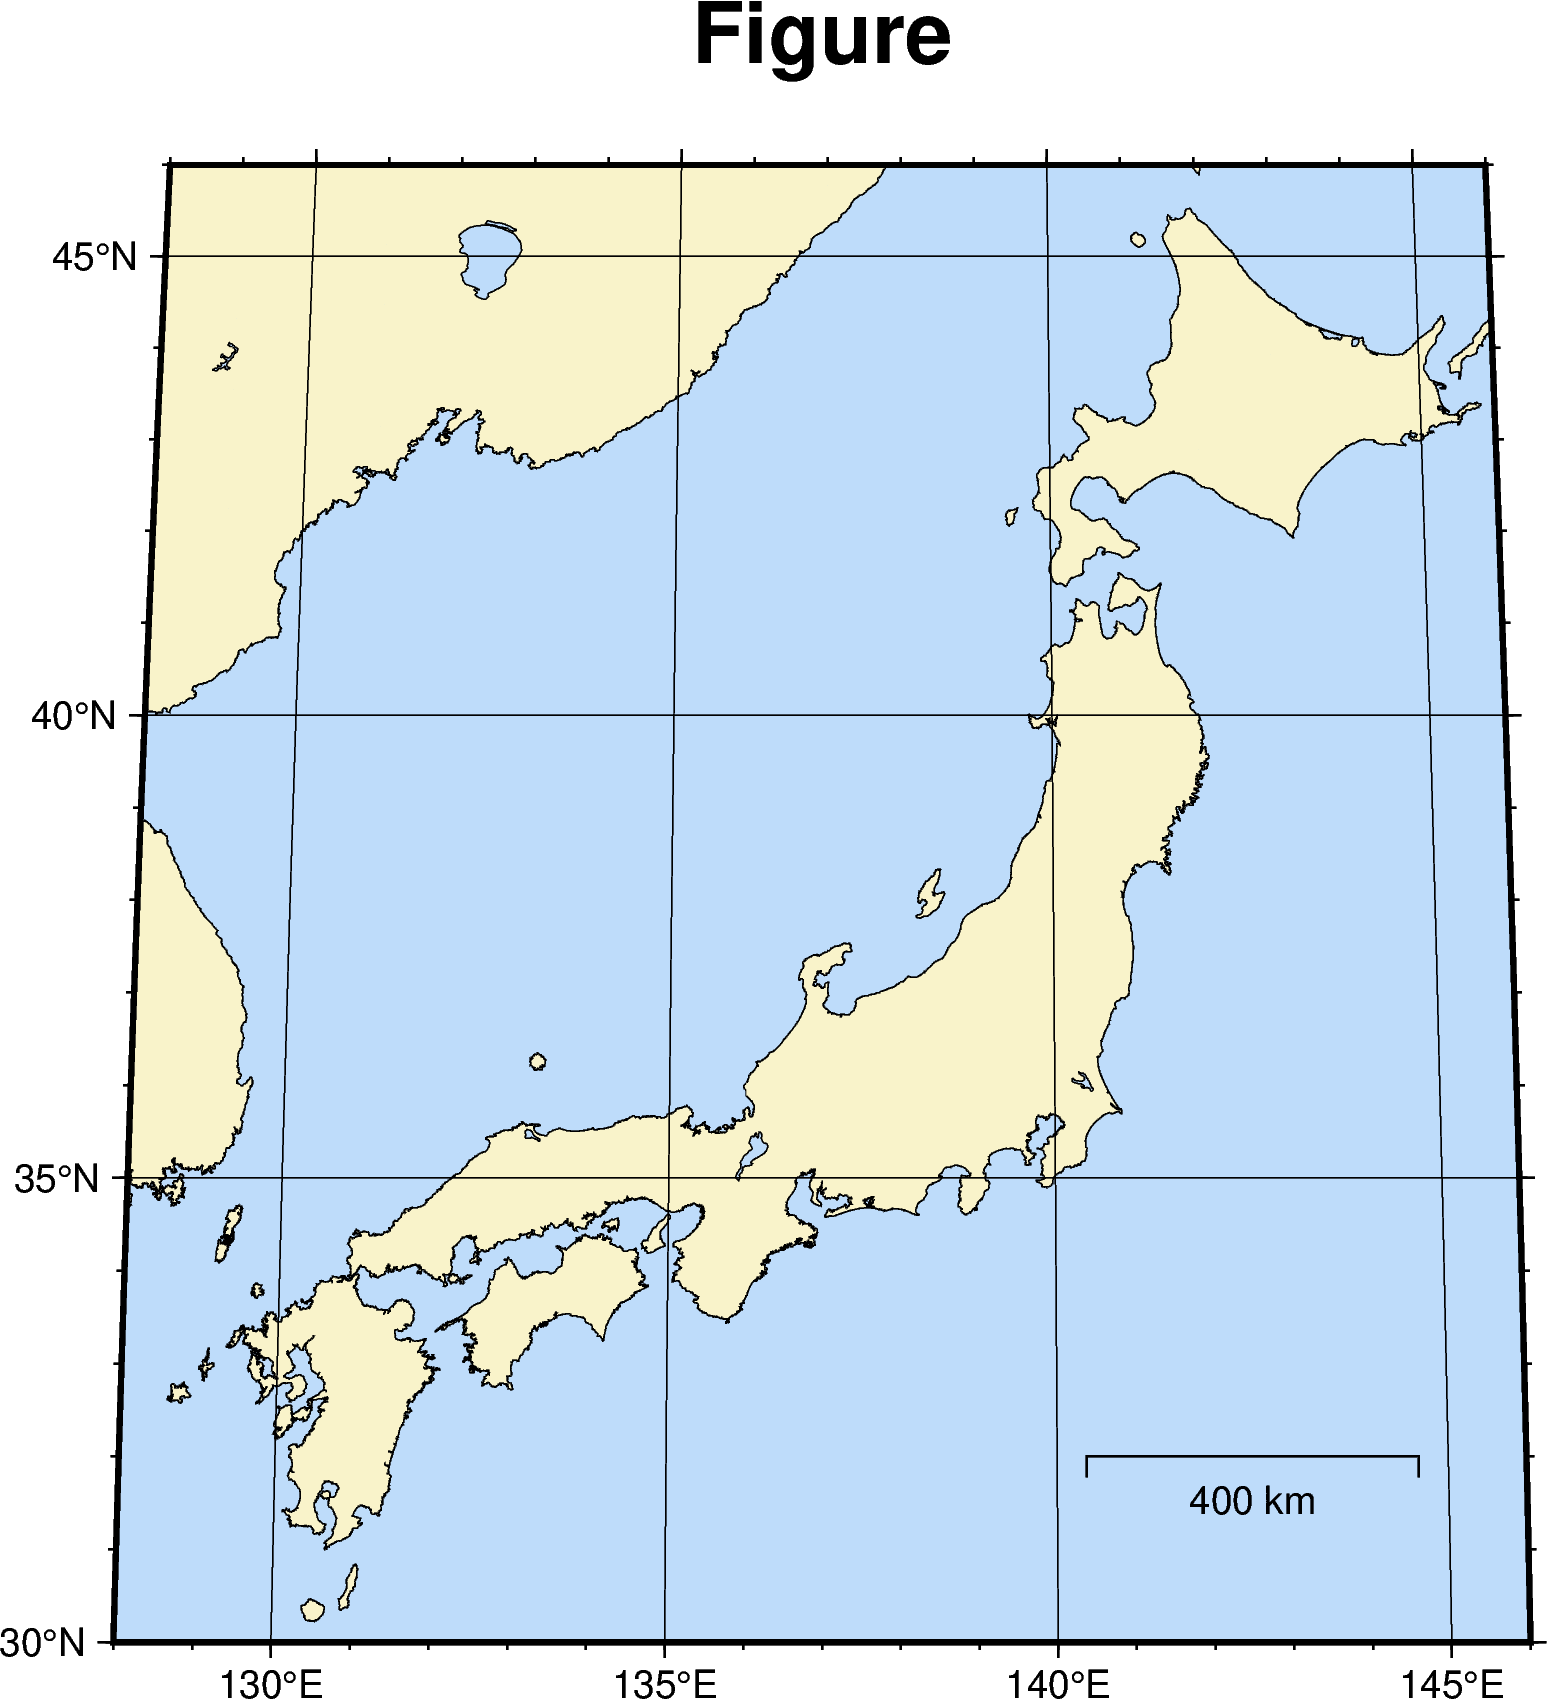

In [7]:
fig = pygmt.Figure()

fig.coast(
    J = 'N138/12c',                        
    R = (128, 146, 30, 46),                
    W = 'default,black',                   
    A = 100,                               
    D = 'f',                               
    G = '249/243/202',                     
    S = '190/220/250',                     
    L = '142.5/32/32/400',                 
    B = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)

fig.show()

オプション名のエイリアスなので当然ですが，結果として得られる画像は全く同じです．ただし，
```text
SyntaxWarning: Short-form parameter (R) is not recommended. 
               Use long-form parameter 'region' instead.
```
のような警告がたくさん出てきます．

```{tip}
従来のGMTユーザーは，この警告を逆手にとって，まず自分の知っている short-form オプションでpygmtを動かしてみて，
そこで表示される `SyntaxWarning` を見て現代的な long-form parameter 名を調べるようにすると，ドキュメントを引く手間が省けてよいかもしれません．

```

```{danger}
さらに凝ったTipsとしては，**公式には実装，ドキュメント化されていない機能の利用** があります．PyGMTの公式マニュアルを読んでいると，GMTの各モジュールに対して，必ずしもすべてのオプションが実装，ドキュメント化されているわけではないことがわかります．

しかし，そのような場合でもshort-formオプションをつかうと「動いてしまう」ことがしばしばあるようなのです．もちろんこれは自己責任での利用になりますし，今後PyGMTの開発が進むことで減っていくことでしょう．
```

### 従来型のGMTスクリプトとの比較

### pygmtとシェルスクリプトの比較

これまでに紹介した PyGMTのスクリプトと，それらと（ほとんど）同じ図を出力するbashによる従来型のGMTスクリプトを比較してみます．以下のタブをクリックするとコードが表示されます．なお，比較しやすいようできるだけ改行を多めに書いています．

`````{tab-set}
````{tab-item} pygmt long

```python
fig = pygmt.Figure()

fig.coast(
    projection  = 'N138/12c',
    region      = (128, 146, 30, 46),
    shorelines  = 'default,black',
    area_thresh = 100,
    resolution  = 'f',
    land        = '230/240/220',
    water       = '220/235/250',
    map_scale   = '142.5/32/32/400',
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg']
)
```
````
````{tab-item} pygmt short
```python
fig = pygmt.Figure()

fig.coast(
    J = 'N138/12c',                        
    R = (128, 146, 30, 46),                
    W = 'default,black',                   
    A = 100,                               
    D = 'f',                               
    G = '230/240/220',                     
    S = '220/235/250',                     
    L = '142.5/32/32/400',                 
    B = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)
```
````
````{tab-item} bash classic
```bash
#!/bin/bash

# 海岸線と枠を描画
gmt pscoast -JN138/12c \
            -R128/146/30/46 \
            -Wdefault,black \
            -A100 \
            -Df \
            -G230/240/220 \
            -S220/235/250 \
            -L142.5/32/32/400 \
            -BWSen+t"Figure" -Bxafg -Byafg \
> fig/classic-coastline.ps

# Postscript画像をPNGに変換
gmt psconvert -Tg -A -P -Qg2 -Qt2 fig/classic-coastline.ps

# 不要な中間生成物であるPostscriptを削除
rm -f fig/classic-coastline.ps
```
````
````{tab-item} bash modern
```bash
#!/bin/bash

# modern mode では gmt begin ~ end の間でコマンド実行．
gmt begin fig/modern-coastline png

    gmt coast \
        -JN138/12c \
        -R128/146/30/46 \
        -Wdefault,black \
        -A100 \
        -Df \
        -G230/240/220 \
        -S220/235/250 \
        -L142.5/32/32/400 \
        -BWSen+t"Figure" -Bxafg -Byafg 
        
gmt end
```
````
`````

このような単一のコマンドからなるスクリプトではあまり差が大きくありませんが，コードの可読性は一番左のpygmt long optionがもっとも高いでしょう．また，PyGMTとGMT6 modern modeでは複数のGMTコマンドを用いる図においてミスを犯しやすい `-O` と `-K` オプションが不要であったり，現代では直接用いることはあまりない（と思われる）Postscriptファイルから他形式に変換する手間が省けています．